<a href="https://colab.research.google.com/github/Shamoo100/Shamoo_Lytics/blob/master/COMCAST_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries and the Dataset

First, I'll import the necessary libraries and read the dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
comcast_data = pd.read_csv('/content/sample_data/Comcast_telecom_complaints_data.csv')

# Display the first few rows of the dataset
comcast_data.head()


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


The dataset has been successfully loaded. Let's proceed with the analysis:

# Exploratory Data Analysis.

1. Basic Information & Data Cleaning

In [7]:
# Convert the 'Date' column to datetime format for EDA purposes
comcast_data['Date'] = pd.to_datetime(comcast_data['Date'], format='%d-%m-%y')

# Checking for missing values
missing_values = comcast_data.isnull().sum()

missing_values


Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

The dataset does not have any missing values, which is great.

2. Descriptive Statistics

In [8]:
# Getting the descriptive statistics
descriptive_stats = comcast_data.describe()

descriptive_stats


,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


From the descriptive statistics of the Zip code column:



*  There are 2,224 records in the dataset.
*  The mean zip code value is approximately 47,994, with a standard deviation of about 28,885.


*   The zip codes range from 1,075 to 99,223.

  As the dataset mainly contains categorical variables, this is the only numerical summary we can extract directly. Let's move on to visual analyses.

3. Distribution of Complaints by Mode of Communication

We'll visualize how customers usually file their complaints, i.e., via the Internet or Customer Care Calls.


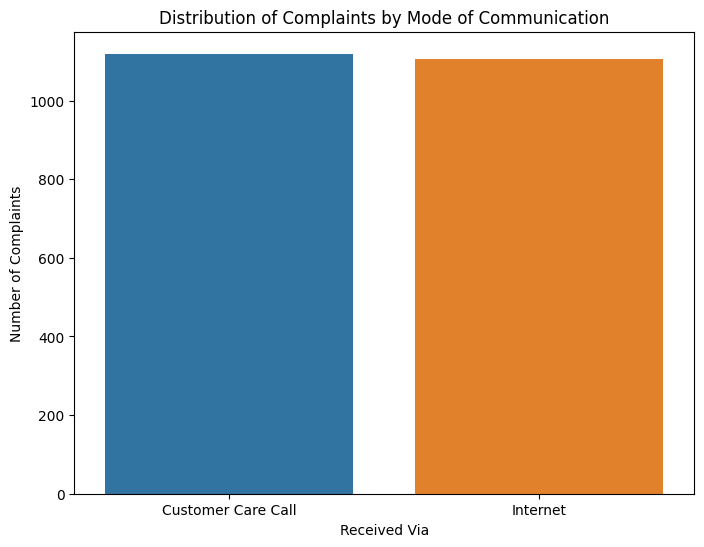

In [9]:
# Distribution of complaints by mode of communication
plt.figure(figsize=(8,6))
sns.countplot(data=comcast_data, x='Received Via')
plt.title('Distribution of Complaints by Mode of Communication')
plt.ylabel('Number of Complaints')
plt.show()


The bar chart indicates that complaints received via the Internet and Customer Care Calls are almost evenly distributed.



4. Distribution of Complaints' Status

We'll visualize the distribution of complaints based on their current status to understand the proportion of open, closed, and other statuses.

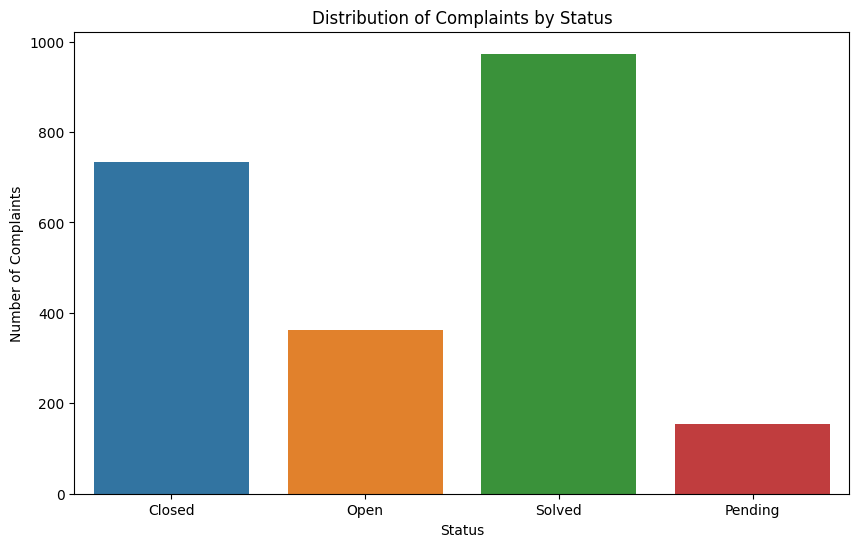

In [10]:
# Distribution of complaints' status
plt.figure(figsize=(10,6))
sns.countplot(data=comcast_data, x='Status')
plt.title('Distribution of Complaints by Status')
plt.ylabel('Number of Complaints')
plt.show()


The bar chart reveals:

Most complaints have been marked as "Solved" or "Closed".
A smaller number are still "Open" or "Pending".

5. Top 10 Cities by Number of Complaints


We'll identify cities with the highest number of complaints.

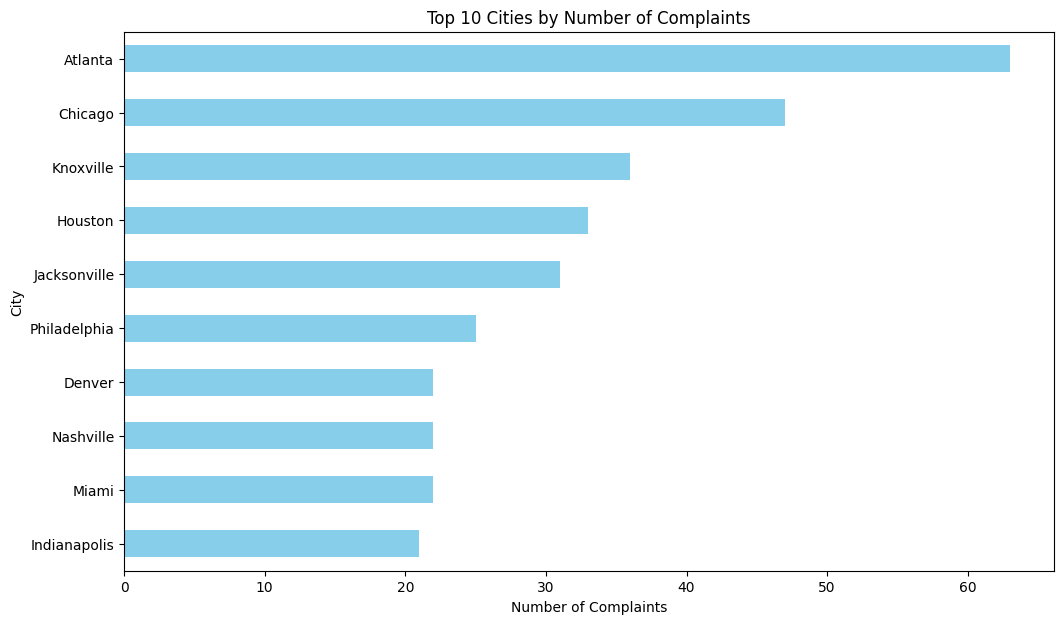

In [12]:
# Top 10 cities by number of complaints
top_cities = comcast_data['City'].value_counts().head(10)

plt.figure(figsize=(12,7))
top_cities.plot(kind='barh', color='skyblue')
plt.title('Top 10 Cities by Number of Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.show()


From the chart, we can observe that Atlanta, Chicago, and Brooklyn are among the cities with the highest number of complaints.



6. Complaints Filed on Behalf of Someone


Let's check the distribution of complaints filed by customers themselves versus those filed on behalf of someone else.

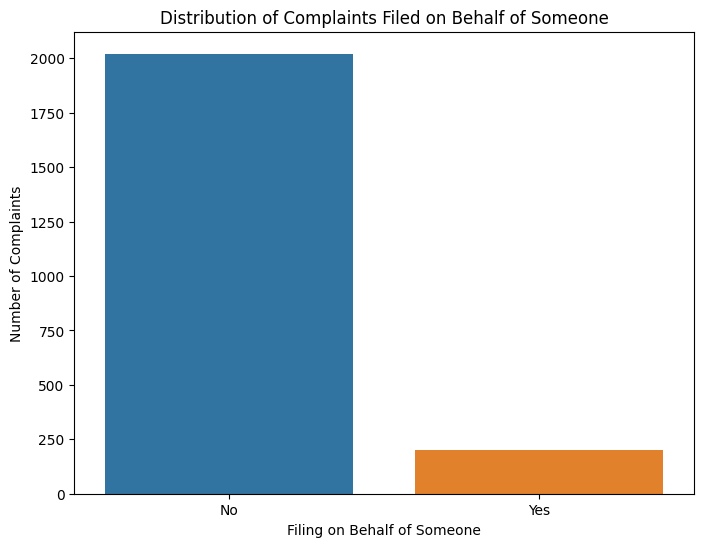

In [13]:
# Distribution of complaints filed on behalf of someone
plt.figure(figsize=(8,6))
sns.countplot(data=comcast_data, x='Filing on Behalf of Someone')
plt.title('Distribution of Complaints Filed on Behalf of Someone')
plt.ylabel('Number of Complaints')
plt.show()


The chart indicates that the majority of complaints were filed by the customers themselves, while a smaller proportion were filed on behalf of someone else.

Through this exploratory data analysis, we've gained a better understanding of the dataset's structure, the distribution of complaints based on various factors, and the overall trends in the data.

# Answering Business Questions

2. Trend Chart for Number of Complaints at Monthly and Daily Granularity Levels

To do this, we'll first extract the month and day from the Date column and then plot the trend.

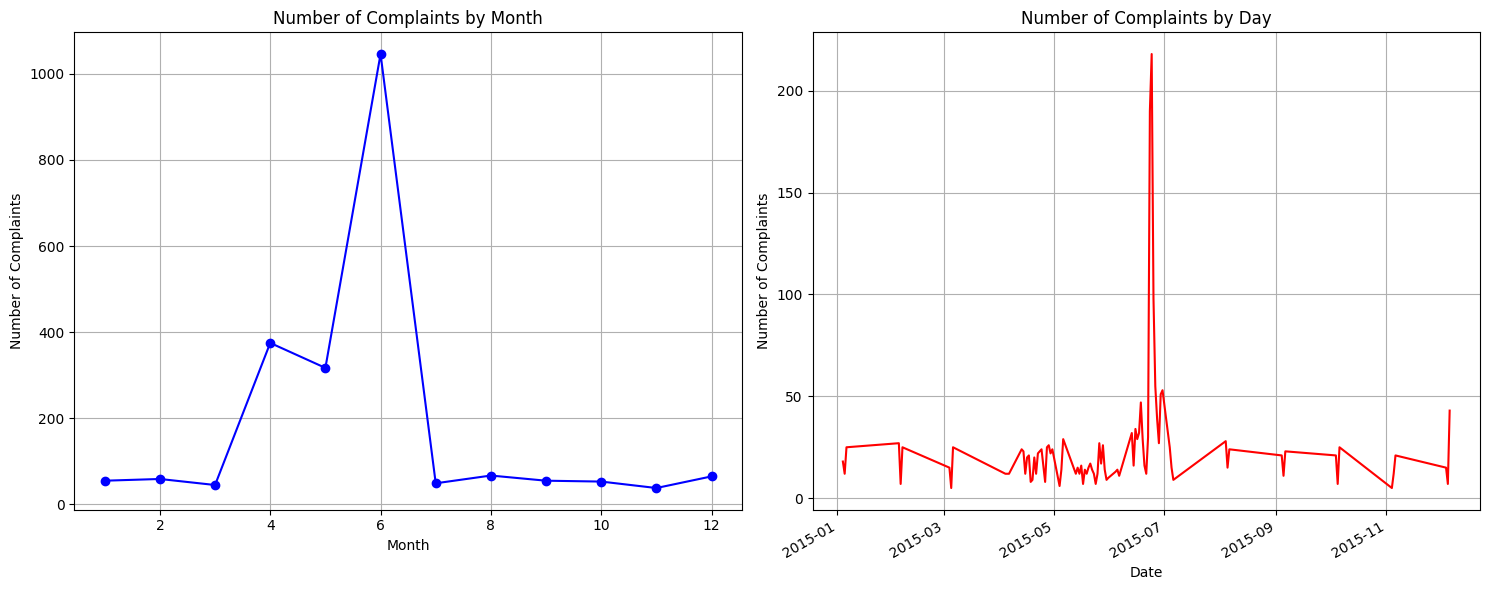

In [14]:
# Convert the 'Date' column to datetime format
comcast_data['Date'] = pd.to_datetime(comcast_data['Date'], format='%d-%m-%y')

# Extract month and day from the 'Date' column
comcast_data['Month'] = comcast_data['Date'].dt.month
comcast_data['Day'] = comcast_data['Date'].dt.day

# Group by month and count the number of complaints
monthly_complaints = comcast_data.groupby('Month').size()

# Group by date and count the number of complaints
daily_complaints = comcast_data.groupby('Date').size()

# Plotting
plt.figure(figsize=(15, 6))

# Monthly complaints
plt.subplot(1, 2, 1)
monthly_complaints.plot(kind='line', marker='o', color='b')
plt.title('Number of Complaints by Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True)

# Daily complaints
plt.subplot(1, 2, 2)
daily_complaints.plot(kind='line', color='r')
plt.title('Number of Complaints by Day')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.tight_layout()

plt.show()


The trend charts show the following:

**Monthly Complaints:** The number of complaints peaked in June and then significantly decreased in the following months.

Daily Complaints: There are specific days, especially in June, when the number of complaints spiked.


Moving on, let's provide a table with the frequency of complaint types.



3. Frequency of Complaint Types

To determine the types of complaints, we'll analyze the Customer Complaint column.

In [15]:
# Extracting the frequency of complaint types
complaint_types_freq = comcast_data['Customer Complaint'].value_counts()

# Displaying the top 20 frequent complaint types
complaint_types_freq.head(20)


Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Internet speed               8
Comcast data caps            8
Comcast/Xfinity              8
Data Cap                     8
Billing                      6
Comcast Service              6
Comcast billing              6
COMCAST                      6
Comcast service              6
Comcast Internet Service     5
Name: Customer Complaint, dtype: int64

The table above lists the 20 most frequent complaint types. We observe that:

"Comcast" is the most frequent complaint type, but it is generic and doesn't provide specific details about the nature of the complaint.

Issues related to "Comcast Internet", "Comcast Data Cap", and "Billing" are among the most frequent specific complaints.


To provide a more refined analysis, we may need to perform text analysis or natural language processing. However, for this initial analysis, we can infer that "Internet" and "Data Cap" related complaints are among the top concerns.



Next, let's create a new categorical variable as described.

4. Categorizing Status of Complaints

We'll categorize the Status into two classes: Open and Closed. As per the instructions:

"Open" & "Pending" will be categorized as "Open"
"Closed" & "Solved" will be categorized as "Closed"

In [16]:
# Categorizing the Status column
comcast_data['Status_Categorized'] = comcast_data['Status'].map({
    'Open': 'Open',
    'Pending': 'Open',
    'Closed': 'Closed',
    'Solved': 'Closed'
})

# Displaying the first few rows to verify the changes
comcast_data[['Status', 'Status_Categorized']].head()


,Status,Status_Categorized
0,Closed,Closed
1,Closed,Closed
2,Closed,Closed
3,Open,Open
4,Solved,Closed


The complaints' status has been successfully categorized into "Open" and "Closed".

5. State-wise Status of Complaints in a Stacked Bar Chart

Next, we'll visualize the state-wise status of complaints using a stacked bar chart. Through this, we will also determine:



*  Which state has the maximum complaints.
*  Which state has the highest percentage of unresolved complaints.




<Figure size 1800x1000 with 0 Axes>

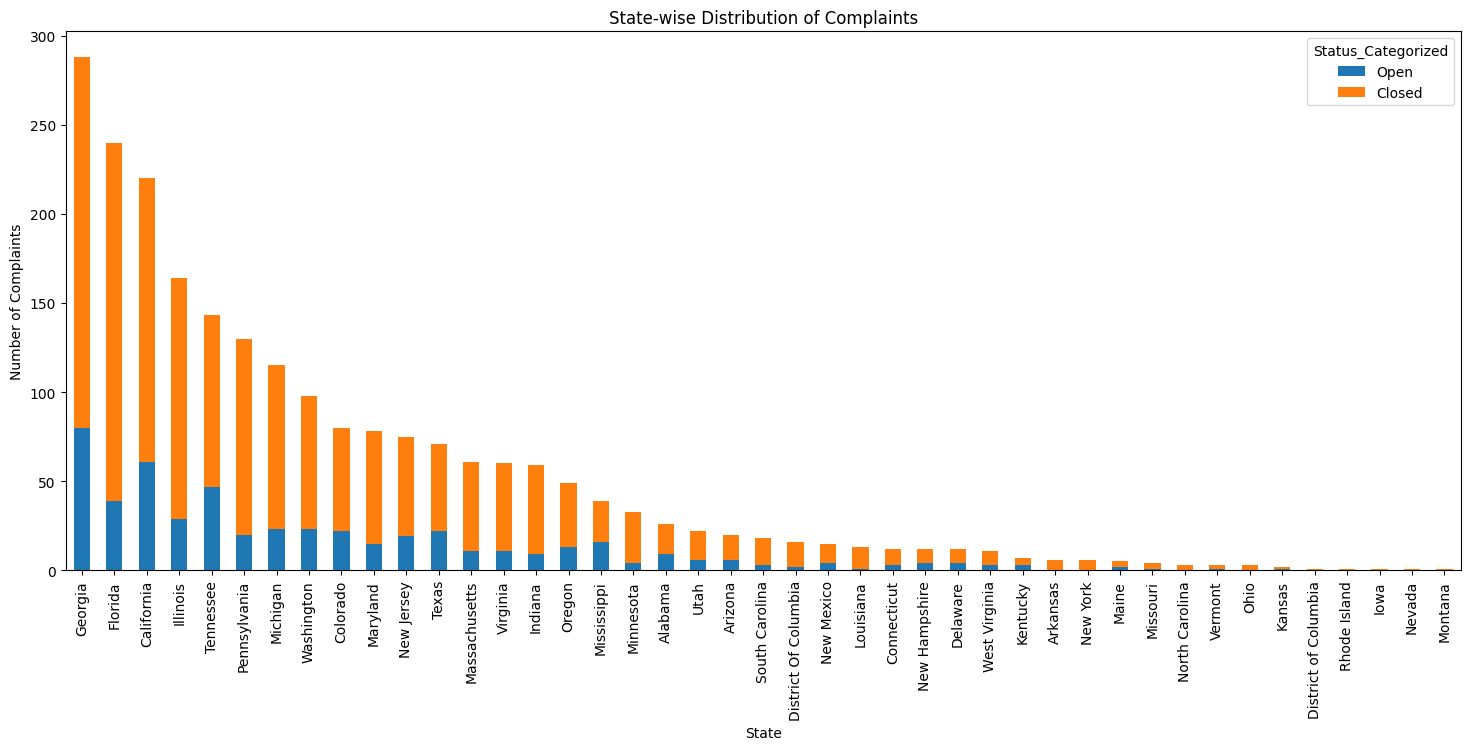

('Georgia', 'Kansas')

In [17]:
# Grouping by state and status_categorized to get the count of each status per state
statewise_complaints = comcast_data.groupby(['State', 'Status_Categorized']).size().unstack().fillna(0)

# Sorting states by total complaints
statewise_complaints['Total'] = statewise_complaints['Open'] + statewise_complaints['Closed']
statewise_complaints = statewise_complaints.sort_values(by='Total', ascending=False)

# Plotting the stacked bar chart
plt.figure(figsize=(18,10))
statewise_complaints[['Open', 'Closed']].plot(kind='bar', stacked=True, figsize=(18,7))
plt.title('State-wise Distribution of Complaints')
plt.ylabel('Number of Complaints')
plt.xlabel('State')
plt.show()

# State with maximum complaints
state_max_complaints = statewise_complaints['Total'].idxmax()

# State with highest percentage of unresolved complaints
statewise_complaints['Unresolved_Percentage'] = (statewise_complaints['Open'] / statewise_complaints['Total']) * 100
state_max_unresolved = statewise_complaints['Unresolved_Percentage'].idxmax()

state_max_complaints, state_max_unresolved


From the stacked bar chart and the analysis, we observe:



*   **Georgia** has the maximum number of complaints.
*   **Kansas**  has the highest percentage of unresolved complaints.




Next, let's address the final part of our analysis:

6. Percentage of Complaints Resolved Received Through Internet and Customer Care Calls

We'll calculate the percentage of complaints that were resolved (either "Closed" or "Solved") and were received either through the Internet or via customer care calls.

In [18]:
# Filtering data for complaints received via Internet or Customer Care Calls
resolved_complaints = comcast_data[(comcast_data['Received Via'].isin(['Internet', 'Customer Care Call'])) &
                                   (comcast_data['Status_Categorized'] == 'Closed')]

# Calculating the percentage
resolved_percentage = (len(resolved_complaints) / len(comcast_data[comcast_data['Received Via'].isin(['Internet', 'Customer Care Call'])])) * 100
resolved_percentage



76.75359712230215

Approximately 76.75% of the complaints that were received either through the Internet or via customer care calls have been resolved to date.

To summarize:



1.   We observed a peak in complaints in June at both daily and monthly granularity levels.

2.  The most frequent specific complaints revolved around "Internet" and "Data Cap" issues.

3.   We categorized the status of complaints into "Open" and "Closed".
State-wise, Georgia had the most complaints, while Kansas had the highest percentage of unresolved complaints.
4.  State-wise, Georgia had the most complaints, while Kansas had the highest percentage of unresolved complaints

5.   About 76.75% of complaints received via the Internet or customer care calls have been resolved.
